# **감성분석 모델**

영화 리뷰 데이터 
- https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [3]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
# 데이터 불러오기 
df = pd.read_csv('IMDB Dataset.csv')

In [5]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
# 라벨 분포 확인 
df['sentiment'].value_counts(normalize=True)

positive    0.5
negative    0.5
Name: sentiment, dtype: float64

In [7]:
# 라벨 인코더 실행 (Positive/Negative => 1/0)
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

In [8]:
# 라벨 인코더 실행 결과 확인 
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


## 데이터 전처리 

In [9]:
# 데이터 shpae 확인 
df.shape

(50000, 2)

In [10]:
# 데이터 결측치 확인 
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
# 데이터 중복값 확인 
df.duplicated().sum()

418

In [12]:
# 데이터 중복값 제거 
df = df.drop_duplicates()

In [13]:
# 데이터 중복값 제거 결과 확인 
df.duplicated().sum()

0

In [14]:
# 중복값 제거 후 shape 확인 
df.shape

(49582, 2)

In [15]:
df['sentiment'].value_counts(normalize=True)

1    0.501876
0    0.498124
Name: sentiment, dtype: float64

In [17]:
# train, test data 분류 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['review']], df['sentiment'], train_size = 0.8, test_size=0.2, random_state=2)

In [18]:
X_train.shape, X_test.shape

((39665, 1), (9917, 1))

In [19]:
X_train

,review
5111,I know that some films (I mean: European films...
41608,This movie wasn't just bad - it was terrible. ...
45222,The emergence of Quentin Tarantino and his dub...
46322,General Trelayne is a super-being who wants to...
18127,I'm not even going to waste more time describi...
...,...
44891,Norma Shearer dazzles as she is transformed fr...
30434,I was a still photographer working in Europe t...
6642,"First off, anyone who thinks this sequel to Wi..."
35550,Fame is one of the best movies I've seen about...


In [20]:
## Train Data 전처리 

# 소문자로 변경 
X_train['review'] = X_train['review'].str.lower()
# 영어와 숫자를 제외하고 모두 제거하는 정규 표현식 수행
X_train['review'] = X_train['review'].str.replace("[^a-z0-9 ]", "")

In [21]:
X_train

,review
5111,i know that some films i mean european films t...
41608,this movie wasnt just bad it was terrible aft...
45222,the emergence of quentin tarantino and his dub...
46322,general trelayne is a superbeing who wants to ...
18127,im not even going to waste more time describin...
...,...
44891,norma shearer dazzles as she is transformed fr...
30434,i was a still photographer working in europe t...
6642,first off anyone who thinks this sequel to wil...
35550,fame is one of the best movies ive seen about ...


In [22]:
# 공백을 NaN값으로 대체 
X_train['review'] = X_train['review'].replace("", np.NaN)

In [23]:
# 전처리 후 결측치 확인 
X_train.isnull().sum()

review    0
dtype: int64

In [24]:
## Test Data 전처리 

# 소문자로 변경 
X_test['review'] = X_test['review'].str.lower()
# 영어와 숫자를 제외하고 모두 제거하는 정규 표현식 수앵 
X_test['review'] = X_test['review'].str.replace("[^a-z0-9 ]", "")
# 공백을 NaN값으로 대체 
X_test['review'] = X_test['review'].replace("", np.NaN)

In [25]:
# 전처리 후 결측치 확인 
X_test.isnull().sum()

review    0
dtype: int64

## 데이터 토큰화 

In [26]:
import spacy
from tensorflow.keras.preprocessing.text import Tokenizer

nlp = spacy.load("en_core_web_sm")

In [27]:
# 토큰화 
def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

# token.is_stop : 불용어 
# token.is_punct : 문장부호 
# token.is_alpha : 알파벳

In [28]:
# Train Data 토큰화 
X_train['token'] = X_train['review'].apply(tokenize)
X_train

,review,token
5111,i know that some films i mean european films t...,"[know, film, mean, european, film, bad, film, ..."
41608,this movie wasnt just bad it was terrible aft...,"[movie, not, bad, terrible, watch, actually, f..."
45222,the emergence of quentin tarantino and his dub...,"[emergence, quentin, tarantino, dubious, influ..."
46322,general trelayne is a superbeing who wants to ...,"[general, trelayne, superbeing, want, play, li..."
18127,im not even going to waste more time describin...,"[be, go, waste, time, describe, bad, movie, li..."
...,...,...
44891,norma shearer dazzles as she is transformed fr...,"[norma, shearer, dazzle, transform, frump, add..."
30434,i was a still photographer working in europe t...,"[photographer, work, europe, summer, jim, salt..."
6642,first off anyone who thinks this sequel to wil...,"[think, sequel, william, friedkin, french, con..."
35550,fame is one of the best movies ive seen about ...,"[fame, good, movie, have, see, perform, art, m..."


In [29]:
# Test Data 토큰화 
X_test['token'] = X_test['review'].apply(tokenize)
X_test

,review,token
38151,far from combining the best bits of pontypool ...,"[far, combine, good, bit, pontypool, day, mana..."
24582,actually im still in doubt if theres anything ...,"[actually, be, doubt, s, movie, like, story, u..."
9712,a real disappointment from the great visual ma...,"[real, disappointment, great, visual, master, ..."
19870,this superb film draws on a variety of talente...,"[superb, film, draw, variety, talented, actor,..."
24391,rowan atkinsons mr bean ranks right up there w...,"[rowan, atkinson, mr, bean, rank, right, laure..."
...,...,...
19609,i really enjoyed this debut by ring director h...,"[enjoy, debut, re, director, hideo, nakata, ha..."
3502,this isnt a bad movie its fun to watch for the...,"[not, bad, movie, fun, watch, time, absolutely..."
26708,a woman left alone after the death of her husb...,"[woman, leave, death, husband, find, attract, ..."
1306,it is very hard to come up with new informatio...,"[hard, come, new, information, jfk, jr, fine, ..."


## 정수 인코딩 

In [30]:
# keras의 Tokenizer()이용한 정수 인코딩 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train['token'])

In [31]:
print(tokenizer.word_index)

Output hidden; open in https://colab.research.google.com to view.

In [32]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 139703
등장 빈도가 2번 이하인 희귀 단어의 수: 95156
단어 집합에서 희귀 단어의 비율: 68.11306843804357
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.6168968710208023


In [33]:
# 전체 단어 개수 중 빈도수 2이하인 단어는 제거.
# 0번 패딩 토큰을 고려하여 + 1
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 44548


In [34]:
tokenizer = Tokenizer(vocab_size) 
tokenizer.fit_on_texts(X_train['token'])
X_train = tokenizer.texts_to_sequences(X_train['token'])
X_test = tokenizer.texts_to_sequences(X_test['token'])

In [35]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]

In [36]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

39665
39665


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


## 패딩 

In [37]:
import matplotlib.pyplot as plt

리뷰의 최대 길이 : 1287
리뷰의 평균 길이 : 103.75131728223874


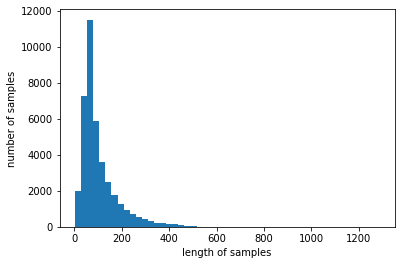

In [38]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [39]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [40]:
max_len = 400
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 400 이하인 샘플의 비율: 98.91087860834489


In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

## LSTM 모델 학습

In [43]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [45]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [46]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [47]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
496/496 [==============================] - ETA: 0s - loss: 0.3741 - acc: 0.8365
Epoch 00001: val_acc improved from -inf to 0.87861, saving model to best_model.h5
496/496 [==============================] - 48s 83ms/step - loss: 0.3741 - acc: 0.8365 - val_loss: 0.3065 - val_acc: 0.8786
Epoch 2/15
496/496 [==============================] - ETA: 0s - loss: 0.1868 - acc: 0.9314
Epoch 00002: val_acc did not improve from 0.87861
496/496 [==============================] - 40s 81ms/step - loss: 0.1868 - acc: 0.9314 - val_loss: 0.3505 - val_acc: 0.8743
Epoch 3/15
496/496 [==============================] - ETA: 0s - loss: 0.1013 - acc: 0.9649
Epoch 00003: val_acc did not improve from 0.87861
496/496 [==============================] - 40s 82ms/step - loss: 0.1013 - acc: 0.9649 - val_loss: 0.4432 - val_acc: 0.8704
Epoch 4/15
496/496 [==============================] - ETA: 0s - loss: 0.0851 - acc: 0.9706
Epoch 00004: val_acc did not improve from 0.87861
496/496 [==========================

In [48]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

310/310 [==============================] - 8s 25ms/step - loss: 0.5189 - acc: 0.8628

 테스트 정확도: 0.8628


## GRU 모델 학습

In [49]:
from tensorflow.keras.layers import GRU

In [50]:
gru = Sequential()
gru.add(Embedding(vocab_size, embedding_dim))
gru.add(GRU(hidden_units))
gru.add(Dense(1, activation='sigmoid'))

In [51]:
gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = gru.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
496/496 [==============================] - ETA: 0s - loss: 0.3929 - acc: 0.8172
Epoch 00001: val_acc improved from 0.87861 to 0.88264, saving model to best_model.h5
496/496 [==============================] - 40s 77ms/step - loss: 0.3929 - acc: 0.8172 - val_loss: 0.2921 - val_acc: 0.8826
Epoch 2/15
496/496 [==============================] - ETA: 0s - loss: 0.1838 - acc: 0.9329
Epoch 00002: val_acc did not improve from 0.88264
496/496 [==============================] - 37s 75ms/step - loss: 0.1838 - acc: 0.9329 - val_loss: 0.2921 - val_acc: 0.8810
Epoch 3/15
496/496 [==============================] - ETA: 0s - loss: 0.0926 - acc: 0.9680
Epoch 00003: val_acc did not improve from 0.88264
496/496 [==============================] - 37s 76ms/step - loss: 0.0926 - acc: 0.9680 - val_loss: 0.4089 - val_acc: 0.8660
Epoch 4/15
496/496 [==============================] - ETA: 0s - loss: 0.0451 - acc: 0.9857
Epoch 00004: val_acc did not improve from 0.88264
496/496 [=======================

In [52]:
print("\n 테스트 정확도: %.4f" % (gru.evaluate(X_test, y_test)[1]))

310/310 [==============================] - 10s 32ms/step - loss: 0.7265 - acc: 0.8668

 테스트 정확도: 0.8668


## 리뷰 예측 

In [68]:
def sentiment_predict(new_sentence):
    new_sentence = new_sentence.lower() 
    new_sentence = new_sentence.replace("[^a-z0-9 ]", "")
    new_sentence = tokenize(new_sentence) # 토큰화(불용어제거 포함)
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(gru.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [69]:
sentiment_predict('best movie of my life')

89.88% 확률로 긍정 리뷰입니다.



In [70]:
sentiment_predict("Good movie")

54.29% 확률로 긍정 리뷰입니다.



In [71]:
sentiment_predict("movie i don't want to see again")

82.50% 확률로 부정 리뷰입니다.



In [72]:
sentiment_predict("Bad Movie")

99.88% 확률로 부정 리뷰입니다.



In [73]:
sentiment_predict("Should I pay money for this?")

99.97% 확률로 부정 리뷰입니다.



In [74]:
def lstm_sentiment_predict(new_sentence):
    new_sentence = new_sentence.lower() 
    new_sentence = new_sentence.replace("[^a-z0-9 ]", "")
    new_sentence = tokenize(new_sentence) # 토큰화(불용어제거 포함)
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    score = float(model.predict(pad_new)) # 예측
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [75]:
lstm_sentiment_predict('best movie of my life')

83.88% 확률로 긍정 리뷰입니다.



In [80]:
lstm_sentiment_predict('Good movie')

63.92% 확률로 긍정 리뷰입니다.



In [77]:
lstm_sentiment_predict("movie i don't want to see again")

67.72% 확률로 부정 리뷰입니다.



In [78]:
lstm_sentiment_predict("Bad Movie")

90.35% 확률로 부정 리뷰입니다.



In [79]:
lstm_sentiment_predict("Should I pay money for this?")

79.46% 확률로 부정 리뷰입니다.

